# Execute the 20news experiment

In [1]:
import nltk
import warnings
import pandas as pd
import numpy as np

import sklearn.metrics as mtr
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

np.random.seed(42)
warnings.filterwarnings('ignore')

# Download the 20news dataset

In [15]:
data_home = '/Users/alfio/Dati/sklearn/'
categories = ['alt.atheism', 'soc.religion.christian', 
              'talk.religion.misc', 'talk.politics.mideast', 'rec.sport.baseball']
data_train = fetch_20newsgroups(subset='train', categories=categories, data_home=data_home)
data_test = fetch_20newsgroups(subset='test', categories=categories, data_home=data_home)

# Set up the competing algorithms

In [16]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'Multinomial Naive Bayes': MultinomialNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

## Prepare train and test sets

Use a simple tokenization with `nltk.word_tokenize` and vectorize with Tf-Idf.

In [17]:
vectorizer = TfidfVectorizer(tokenizer=nltk.word_tokenize)
X_train = vectorizer.fit_transform(data_train.data)
X_test = vectorizer.transform(data_test.data)
y_train, y_test = data_train.target, data_test.target

## Fit

In [18]:
for model_name, model in models.items():
    print("Training: {}".format(model_name))
    models[model_name].fit(X_train, y_train)

Training: Logistic Regression
Training: Support Vector Machine
Training: Multinomial Naive Bayes
Training: Decision Tree
Training: Random Forest
Training: K-Nearest Neighbors


## Predict

In [6]:
predictions = {}
for model_name, model in models.items():
    print("Predicting: {}".format(model_name))
    predictions[model_name] = model.predict(X_test)

Predicting: Logistic Regression
Predicting: Support Vector Machine
Predicting: Multinomial Naive Bayes
Predicting: Decision Tree
Predicting: Random Forest
Predicting: K-Nearest Neighbors


# Print evaluation metrics

In [13]:
import matplotlib.pyplot as plt

In [7]:
E = []
for estimator, y_pred in predictions.items():
    report = mtr.classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    E.append({
        'Model': estimator, 'Accuracy': report['accuracy'],
        'Avg Precision (macro)': report['macro avg']['precision'],
        'Avg Recall (macro)': report['macro avg']['recall'],
        'Avg F1-score (macro)': report['macro avg']['f1-score'],
        'Avg Precision (weighted)': report['weighted avg']['precision'],
        'Avg Recall (weighted)': report['weighted avg']['recall'],
        'Avg F1-score (weighted)': report['weighted avg']['f1-score']
    })
E = pd.DataFrame(E).set_index('Model', inplace=False)

In [8]:
E

,Accuracy,Avg Precision (macro),Avg Recall (macro),Avg F1-score (macro),Avg Precision (weighted),Avg Recall (weighted),Avg F1-score (weighted)
Model,,,,,,,
Logistic Regression,0.797619,0.811864,0.768384,0.774238,0.810938,0.797619,0.790588
Support Vector Machine,0.811012,0.817653,0.785500,0.791652,0.820841,0.811012,0.806673
Multinomial Naive Bayes,0.675595,0.815484,0.615225,0.590462,0.793404,0.675595,0.630711
Decision Tree,0.711310,0.697761,0.692193,0.690709,0.723983,0.711310,0.713841
Random Forest,0.767113,0.809010,0.728180,0.733161,0.801316,0.767113,0.753849
K-Nearest Neighbors,0.637649,0.684749,0.626189,0.627599,0.692063,0.637649,0.639582


In [10]:
p = predictions['Logistic Regression']

In [11]:
cm = mtr.confusion_matrix(y_test, p)

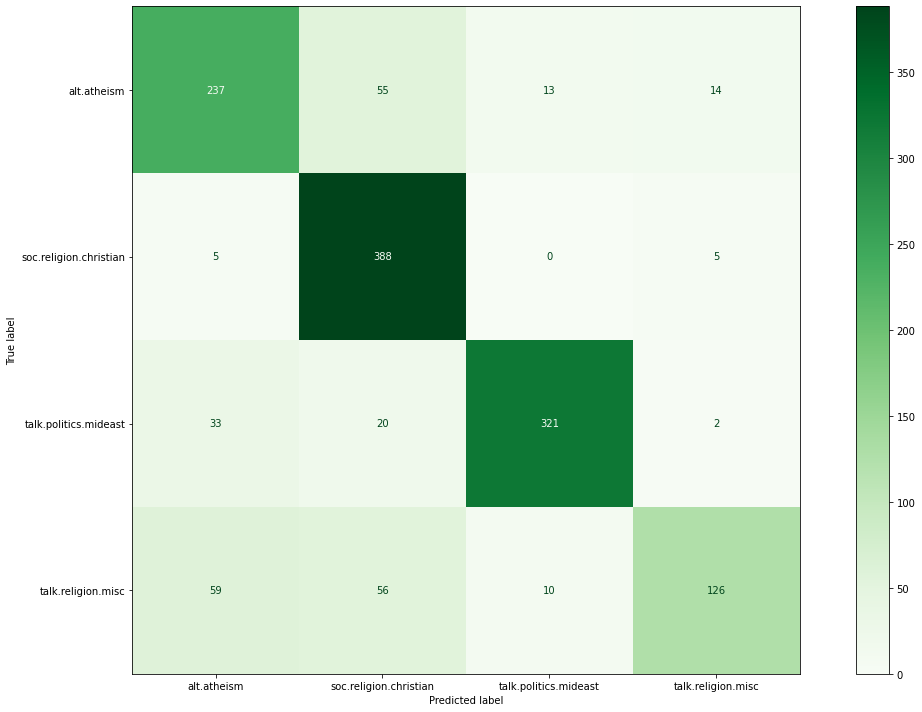

In [14]:
d = mtr.ConfusionMatrixDisplay(cm, data_test.target_names)
fig, ax = plt.subplots(figsize=(16,10))
d.plot(ax=ax, cmap='Greens')
plt.tight_layout()
plt.show()